## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

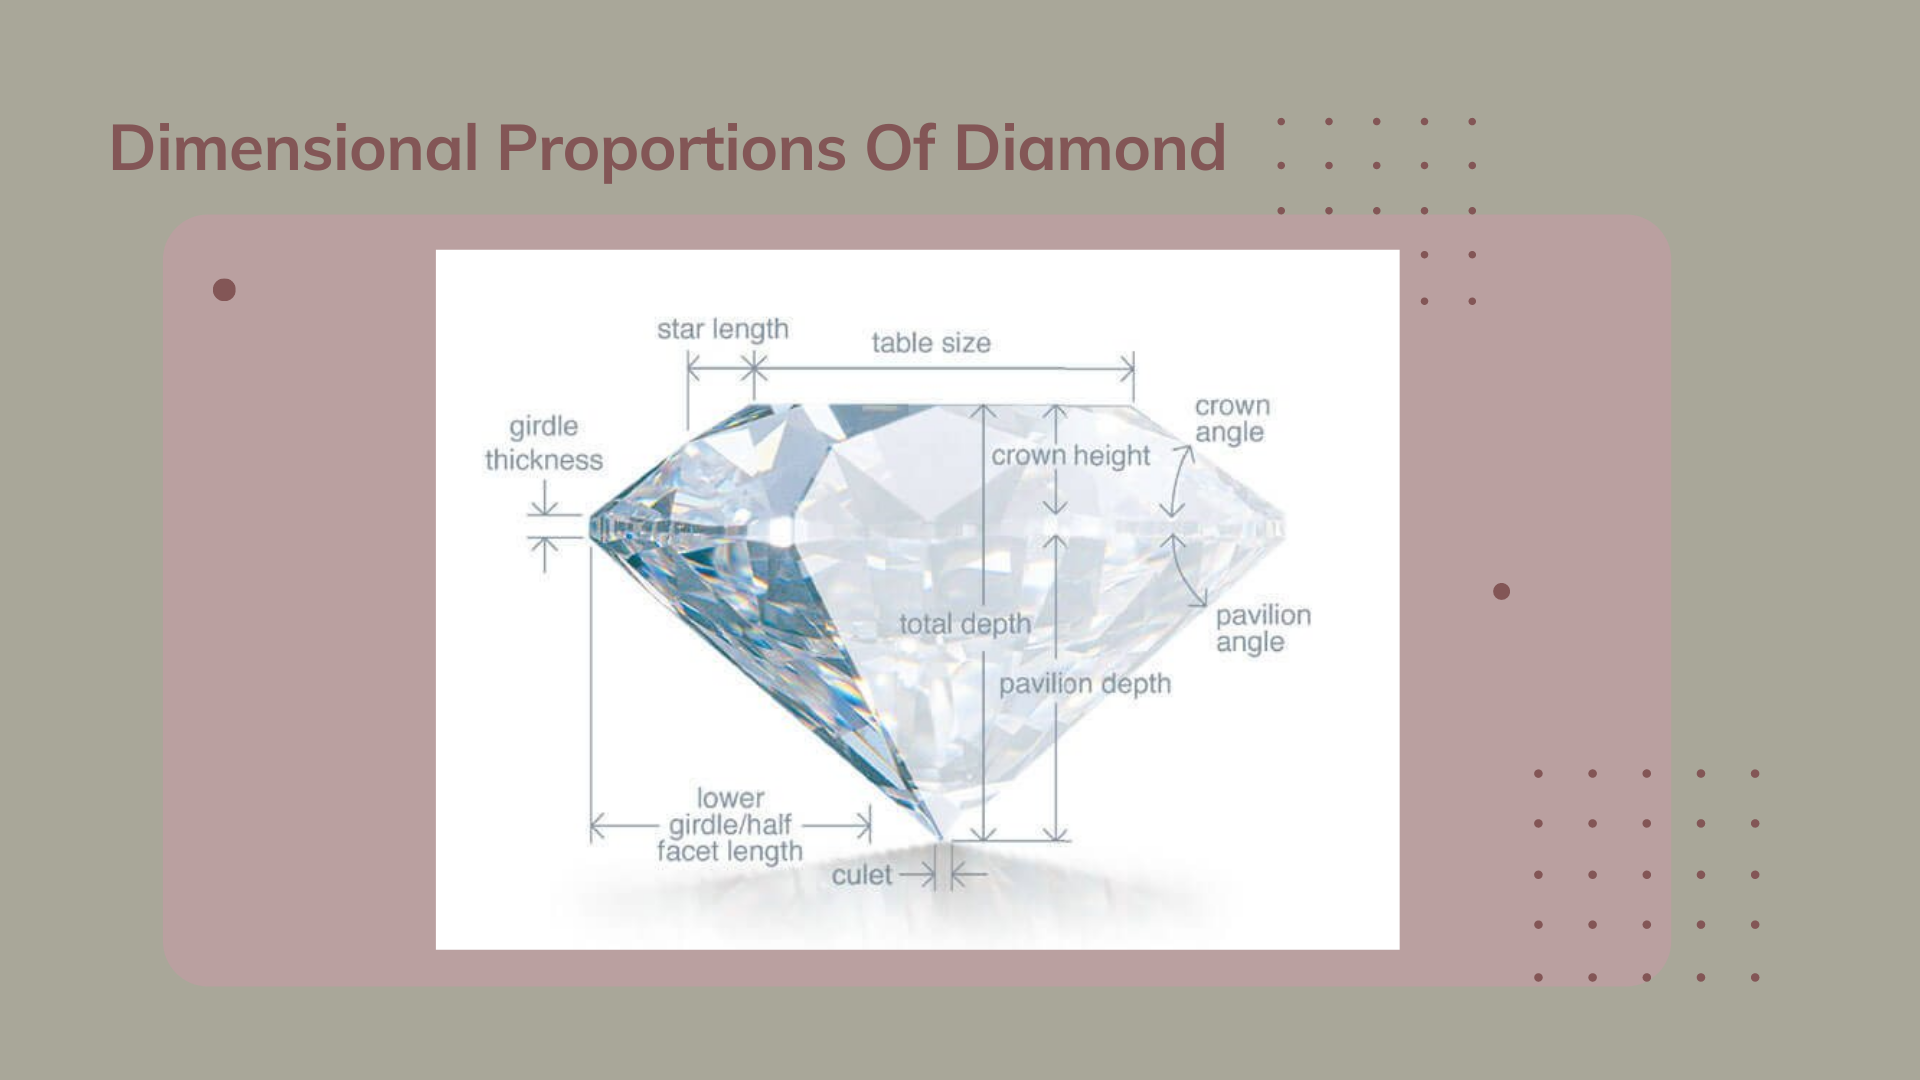

# EDA

## Import the Necessary Libraries

In [63]:
import pandas as pd

## Load The Dataset

In [64]:
## Data Ingestions step
df=pd.read_csv('Dataset/gemstone.csv')

## 1. How Big is the Data

In [65]:
df.shape

(193573, 11)

## 2. How does the Data Look Like?

In [66]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [67]:
#Preferred
df.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
81131,81131,0.30,Premium,H,VS1,61.1,61.0,4.34,4.29,2.63,675
136378,136378,0.25,Ideal,F,VS1,61.8,54.0,4.05,4.11,2.52,438
127480,127480,0.24,Very Good,E,VS1,62.4,58.0,3.92,3.95,2.46,419
96461,96461,0.38,Ideal,I,SI1,62.4,56.0,4.62,4.64,2.89,569
181045,181045,0.28,Ideal,H,VS1,60.4,56.0,4.20,4.22,2.55,480


## 3. What is the Data Type of the Columns?

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


## 4. Are there any Missing Values?

In [69]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## 5. How does the data look Mathematically?

In [70]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [71]:
## Lets drop the id column as it doesn't have any contribution in predicting Diamond Price
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [72]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(193563, 10)

<Axes: xlabel='cut', ylabel='price'>

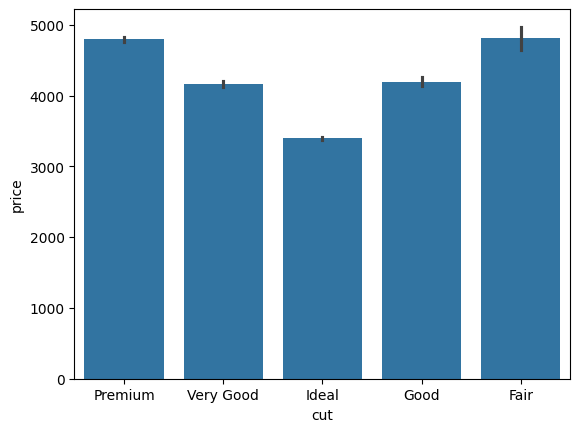

In [73]:
import seaborn as sns
sns.barplot(data=df,x=df['cut'],y=df['price'])

<Axes: xlabel='color', ylabel='price'>

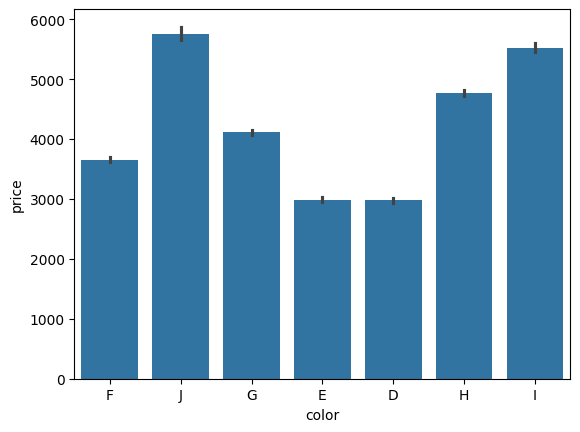

In [74]:

sns.barplot(data=df,x=df['color'],y=df['price'])

<Axes: xlabel='clarity', ylabel='price'>

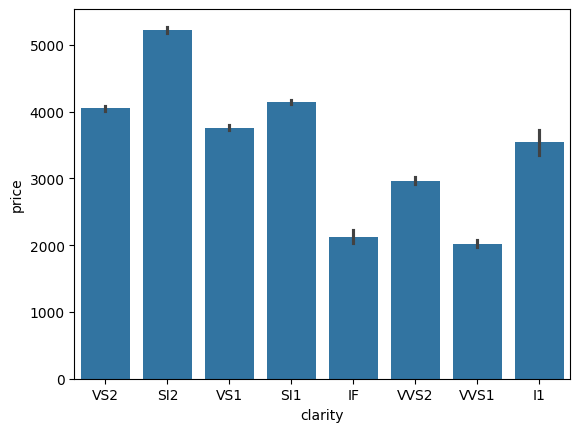

In [75]:
sns.barplot(data=df,x=df['clarity'],y=df['price'])

## 6. Are there any Duplicated Values?

In [76]:
df.duplicated().sum()

0

## 7. How is the Correlation between the Columns?

In [77]:
## Segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [78]:
# Remove non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.027994,0.225677,0.980751,0.980292,0.975554,0.943388
depth,0.027994,1.000000,-0.230627,-0.010536,-0.011434,0.081723,0.002005
table,0.225677,-0.230627,1.000000,0.237686,0.233347,0.212706,0.174868
x,0.980751,-0.010536,0.237686,1.000000,0.999203,0.990698,0.901132
y,0.980292,-0.011434,0.233347,0.999203,1.000000,0.990586,0.901117
z,0.975554,0.081723,0.212706,0.990698,0.990586,1.000000,0.894124
price,0.943388,0.002005,0.174868,0.901132,0.901117,0.894124,1.000000


In [79]:
#Finding correlation with respect to other columns
numeric_df.corr()['price']

carat    0.943388
depth    0.002005
table    0.174868
x        0.901132
y        0.901117
z        0.894124
price    1.000000
Name: price, dtype: float64

In [80]:
df[categorical_columns].describe()

,cut,color,clarity
count,193563,193563,193563
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53271


In [81]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49903
Very Good    37565
Good         11620
Fair          2021
Name: count, dtype: int64

In [82]:
df['color'].value_counts()

color
G    44391
E    35869
F    34255
H    30795
D    24285
I    17512
J     6456
Name: count, dtype: int64

In [83]:
df['clarity'].value_counts()

clarity
SI1     53271
VS2     48025
VS1     30669
SI2     30477
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

## Heatmap Showing Correlation among the Numerical Columns


<Axes: >

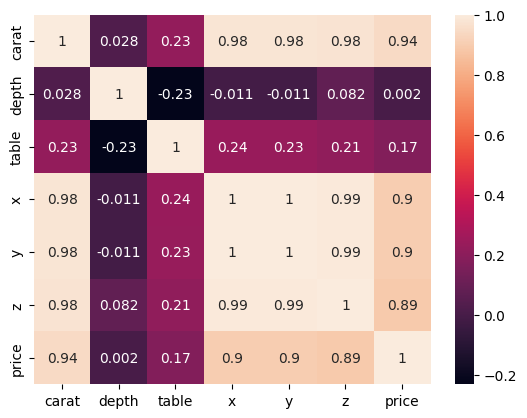

In [84]:
## Correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)

# Data Pre-Processing

## 9. Converting the Categorical Input Columns into Numerical Columns using Label Encoding

In [85]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [86]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [87]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [88]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [89]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [90]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [91]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [92]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


# Machine Learning Model Building

In [93]:
x=df.drop('price',axis=1)
y=df['price']

In [94]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

## Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [96]:
rf=RandomForestRegressor(max_depth=8)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8)

In [97]:
y_pred=rf.predict(X_test)

In [98]:
import numpy as np
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error :",mae)
print("mean_squared_error :",mse)
print("root_mean_squared_error :",rmse)
print("r2_score :",r2*100)

mean_absolute_error : 336.20779000137026
mean_squared_error : 381658.1742934731
root_mean_squared_error : 617.7848932221256
r2_score : 97.66551443279239


In [99]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [100]:
# Assuming rf is your RandomForestRegressor model
rf.predict(np.array([[0.33, 5, 4, 5, 61.6, 56.0, 4.39, 4.43, 2.71]]))

C:\Users\Random Chotoloks\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([714.80812626])

C:\Users\Random Chotoloks\AppData\Local\Temp\ipykernel_11724\3053412500.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y,hist=False,color="r",label="Actual Values")


C:\Users\Random Chotoloks\AppData\Local\Temp\ipykernel_11724\3053412500.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hist=False,color='b',label="Fitted Values,ax=ax")


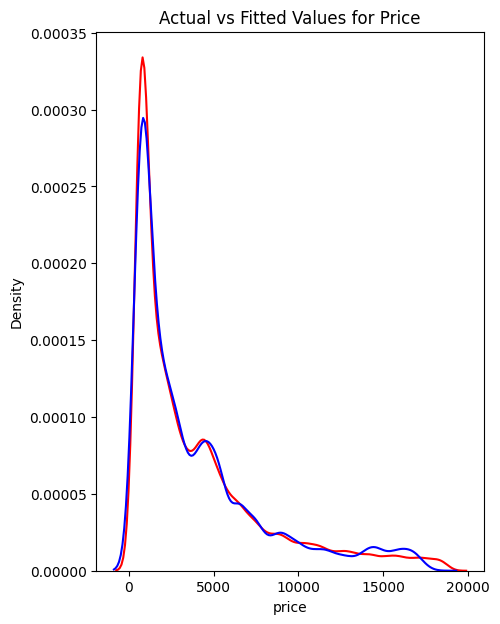

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,7))

ax = sns.distplot(y,hist=False,color="r",label="Actual Values")
sns.distplot(y_pred,hist=False,color='b',label="Fitted Values,ax=ax")

plt.title("Actual vs Fitted Values for Price")

plt.show()
plt.close()


In [102]:
import pickle
file = open('Model/ModelForPrediction.pkl','wb')
pickle.dump(rf,file)
file.close()